In [82]:
# IMPORTS

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings

# warnings.filterwarnings("ignore")

In [83]:
# GET DATASETS

df_features = pd.read_csv('csv/Features.csv')
df_streams = pd.read_csv('csv/Streams.csv')

In [84]:
# CONCAT DATASETS

df_final=pd.concat([df_features,df_streams],axis=1,join='inner')

# DROP USELESS COLUMNS

df_final=df_final.drop(columns=["Release Date","name","id", "duration"]).set_index("Song")
df_final

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Artist,Streams (Billions)
Song,,,,,,,,,,,,,
Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,The Weeknd,3.449
Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,Ed Sheeran,3.398
Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,Tones And I,2.770
Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,Lewis Capaldi,2.680
Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,Post Malone featuring 21 Savage,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,Lukas Graham,1.529
Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,Coldplay,1.527
Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,Maroon 5,1.524


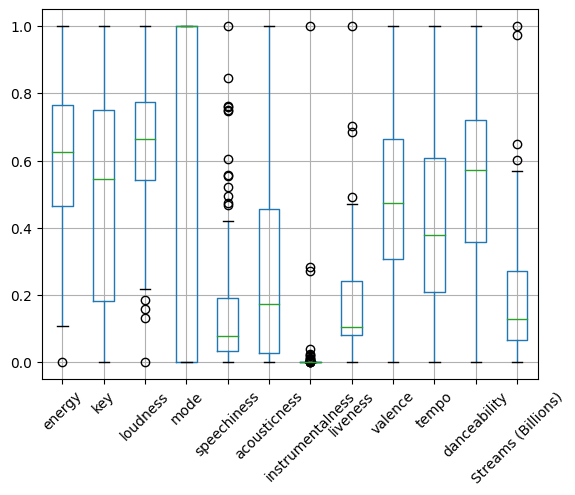

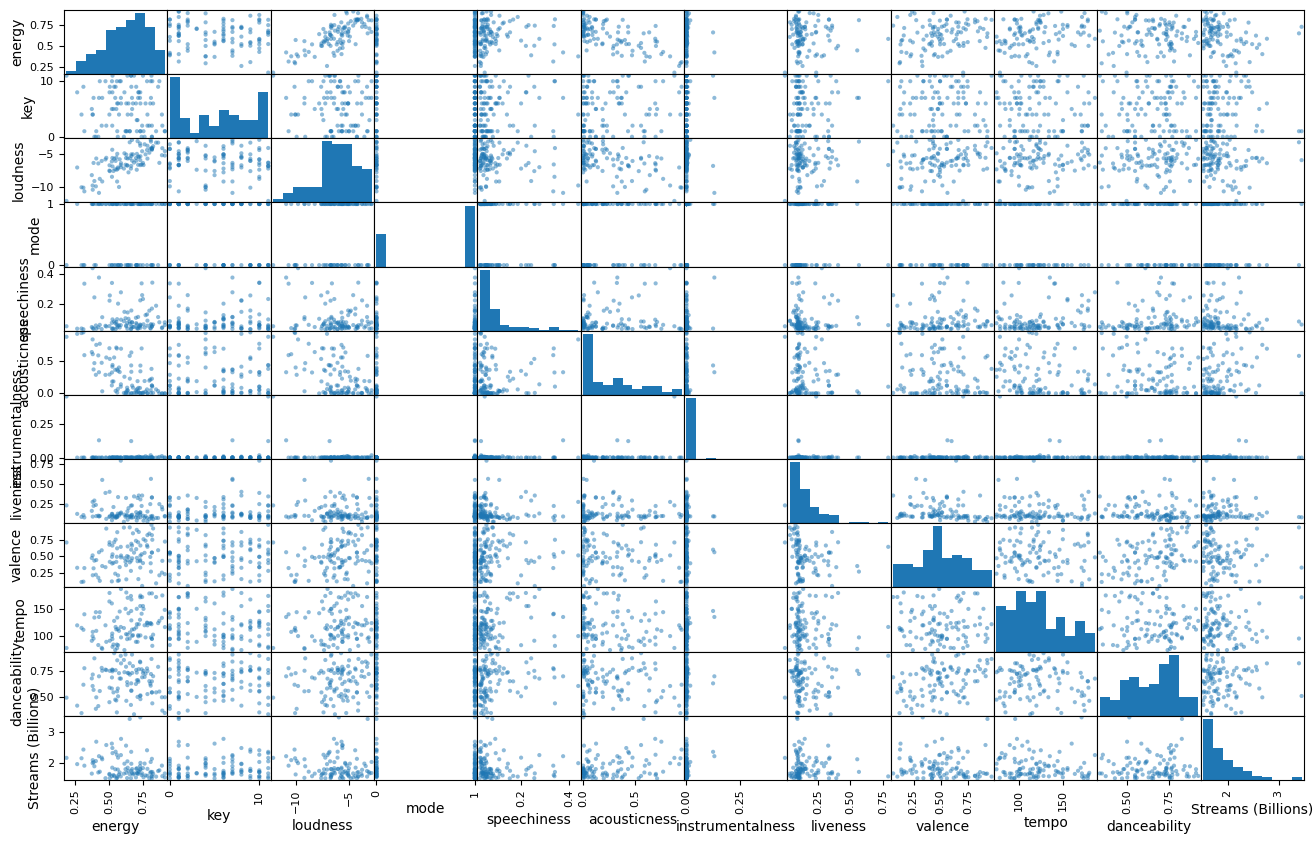

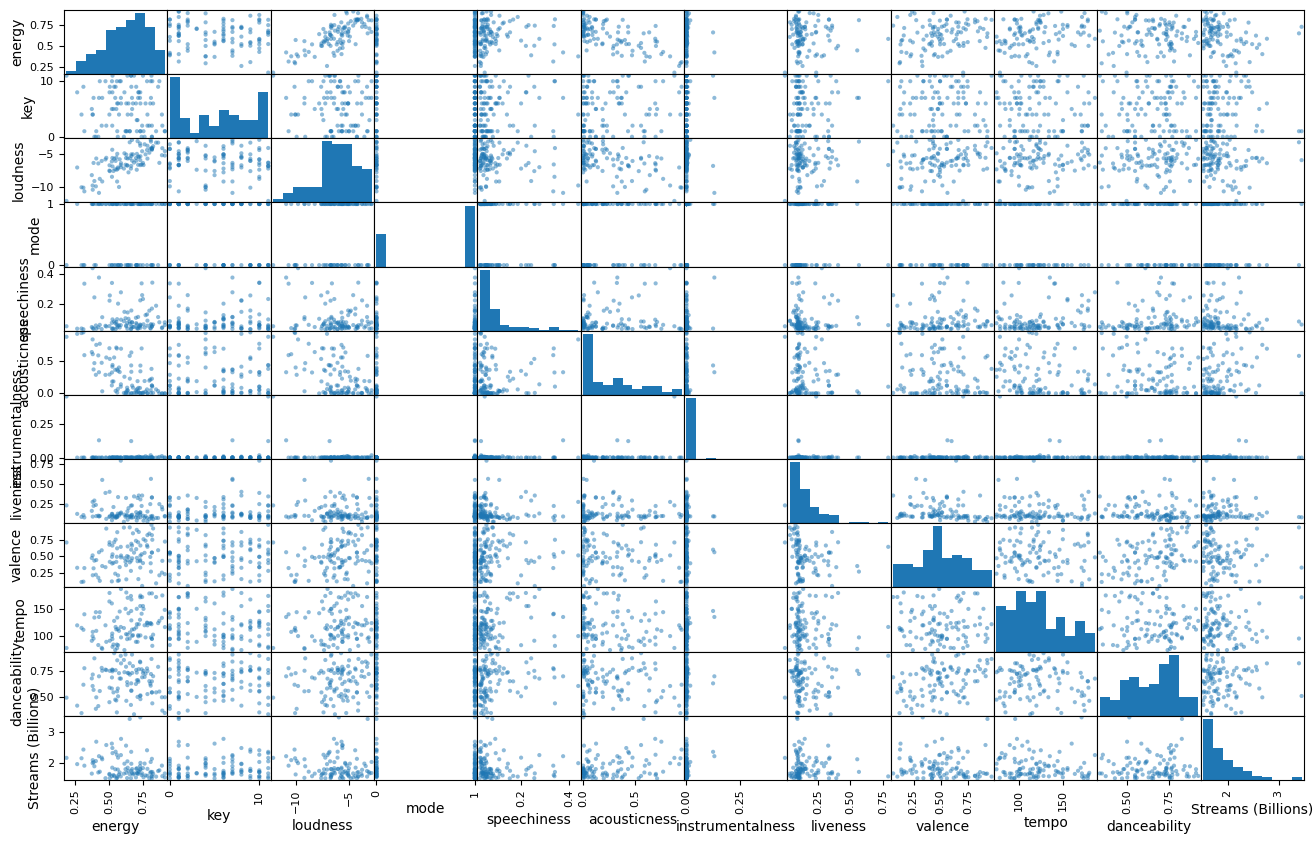

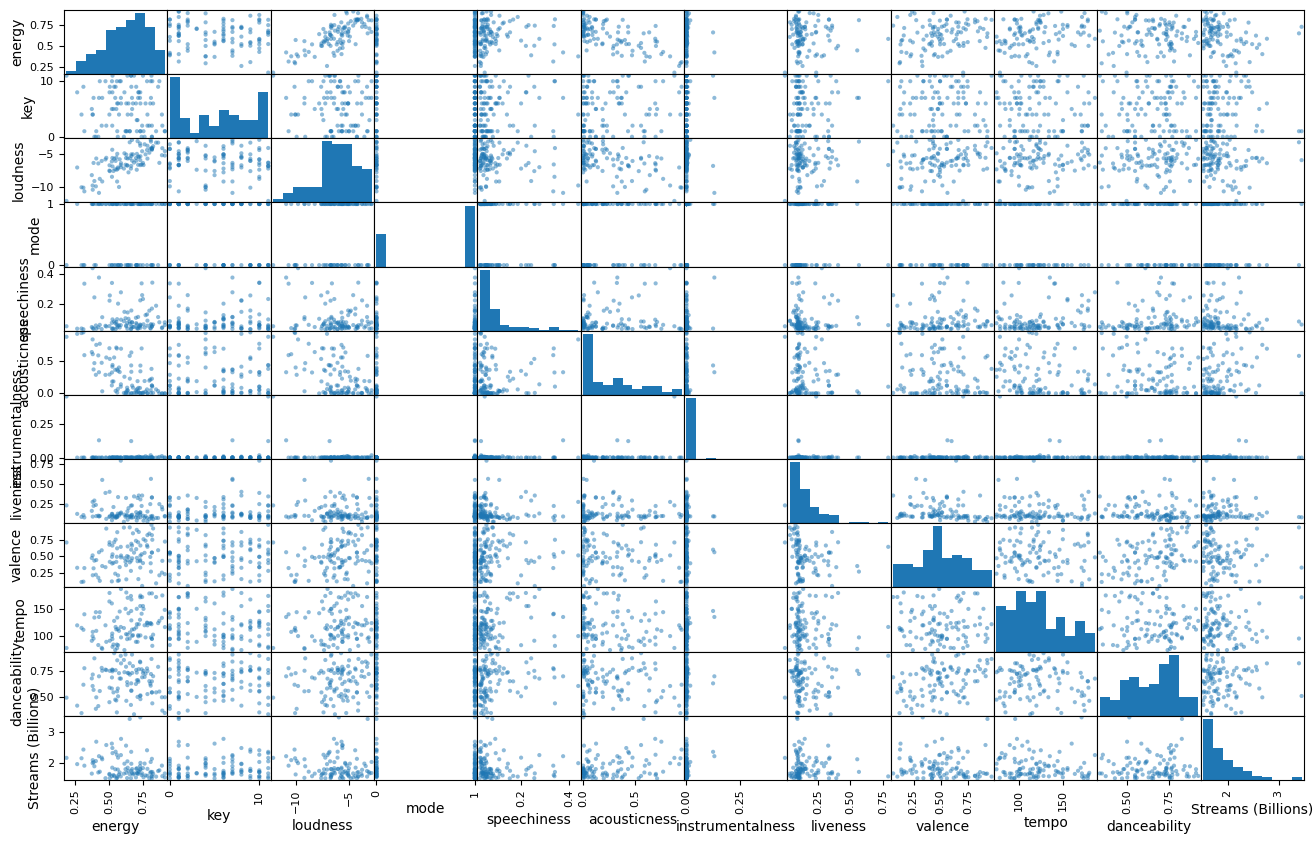

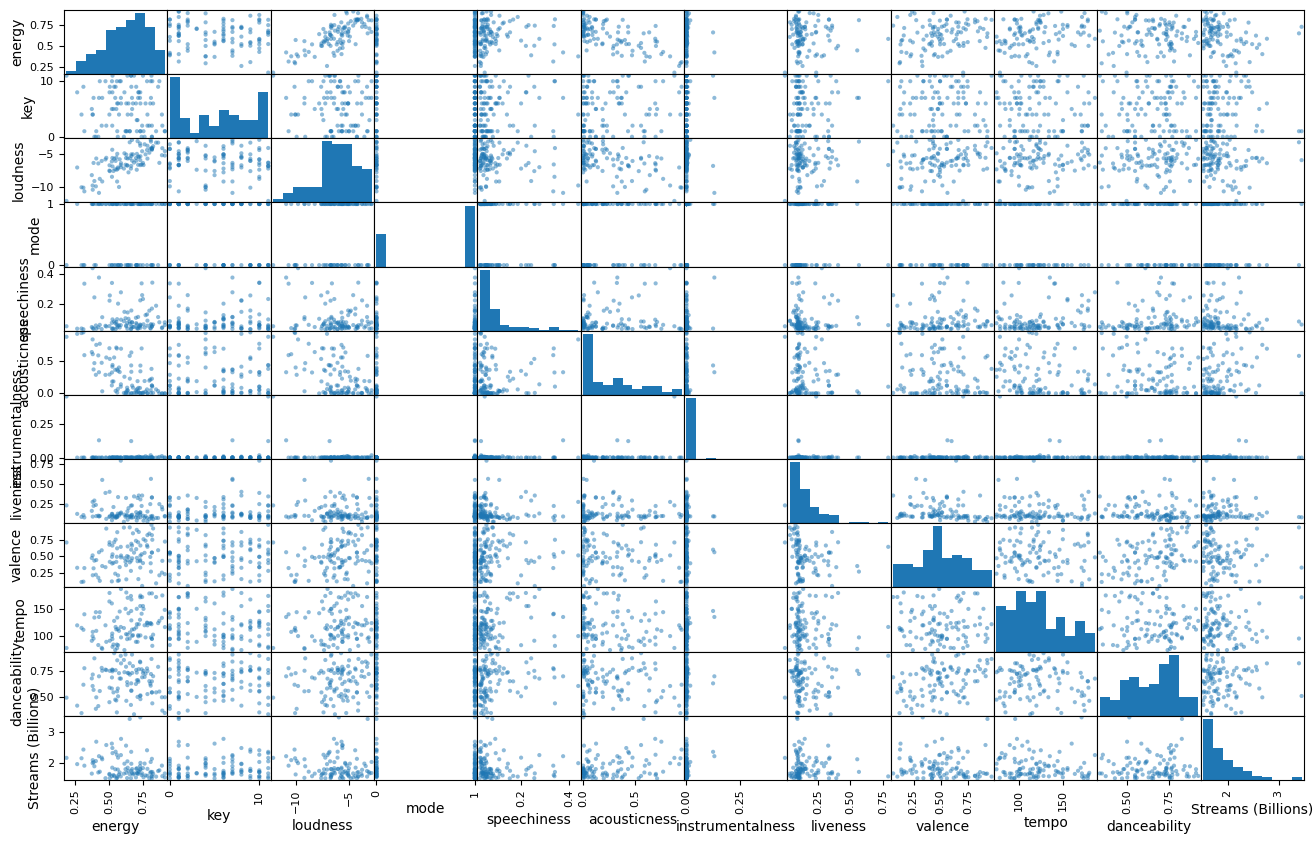

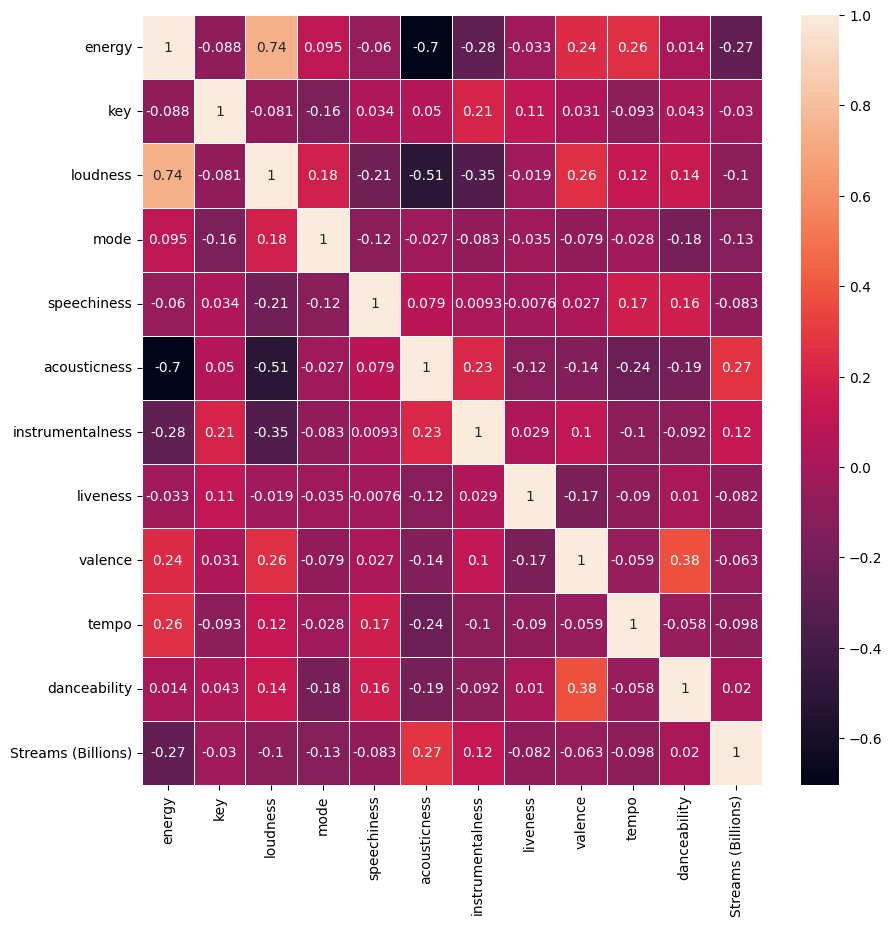

In [94]:
df=df_final.drop(columns=["Artist"])
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

In [95]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max
min_max.fit(df)
min_max.data_min_
min_max.data_max_
min_max.transform(df)
pd.DataFrame(min_max.transform(df), columns=df.columns, index=df.index).boxplot(rot = 45)
df_minmax = min_max.fit_transform(df)
df_minmax

array([[7.49656121e-01, 9.09090909e-02, 6.67482704e-01, ...,
        8.65011791e-01, 2.99483649e-01, 1.00000000e+00],
       [6.42365887e-01, 9.09090909e-02, 9.60298031e-01, ...,
        1.89728728e-01, 8.34767642e-01, 9.73547718e-01],
       [5.54332875e-01, 5.45454545e-01, 6.17881852e-01, ...,
        2.08179576e-01, 8.33046472e-01, 6.47821577e-01],
       ...,
       [8.67950481e-01, 0.00000000e+00, 8.51091006e-01, ...,
        1.84445484e-01, 3.58003442e-01, 1.55601660e-03],
       [8.41815681e-01, 1.81818182e-01, 7.89568920e-01, ...,
        9.27321657e-01, 5.42168675e-01, 5.18672199e-04],
       [5.06189821e-01, 4.54545455e-01, 7.12613092e-01, ...,
        3.39369611e-01, 2.25473322e-01, 0.00000000e+00]])

In [96]:
sns.displot(df_final, x='duration')
plt.show()

ValueError: Could not interpret value `duration` for parameter `x`

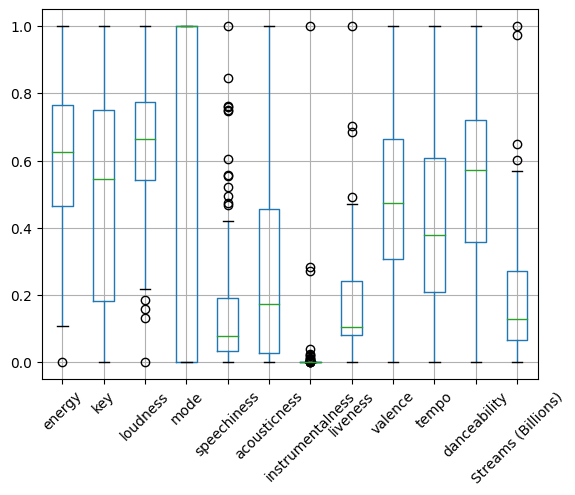

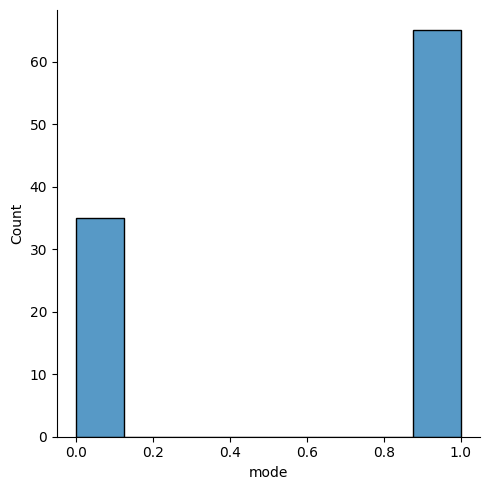

In [97]:
sns.displot(df_final, x='mode')
plt.show()

In [91]:
# ENCODE

# data = pd.get_dummies(df_final, columns=['key', 'mode'])

# MINMAX

# scaler = MinMaxScaler()
# col = ['energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']
# data[col] = scaler.fit_transform(data[col])

# SEP TARGET

# X = data.drop("Streams (Billions)",axis=1)
# y = data["Streams (Billions)"]

#

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)


ValueError: Unknown label type: 'continuous'

In [ ]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [
            ('LogisticRegression', LogisticRegression()),
            ('KNeighborsClassifier', KNeighborsClassifier()),
            ('DecisionTreeClassifier', DecisionTreeClassifier()),
            ('RandomForestClassifier', RandomForestClassifier(n_estimators=trees,max_features=3))
]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: \n\t mean: {} \n\t std: ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

NameError: name 'cross_val_score' is not defined

In [92]:
df_final['mode'].value_counts(normalize=True)


1    0.65
0    0.35
Name: mode, dtype: float64

In [93]:
scatter_mat = scatter_matrix(df_final, figsize = (16,10))
# print(scatter_mat)